
# SIGMA V5.0: Quantitative Structural Audit & Parity Report
**Project:** Crypto-ASCEND Porting Initiative  
**Author:** SIGMA Quant Engine  
**Status:** Verification Phase (D1 Benchmark)

## 1. Executive Summary
This research notebook serves as the **Formal Validation Protocol** for the SIGMA V5.0 detection engine. The objective is to demonstrate 100% mathematical parity between the legacy MQL5 production environment and the new Python-native Quant pipeline for BTCUSDT Perpetual Futures.

We analyze 1,825 daily bars (~5 years) across three distinct layers of market geometry:
1.  **The DNA Layer:** 3-Bar Closest-Commitment Pivot Detection.
2.  **The Event Layer:** Structural Breakout (Bob/Bos) commitment rules.
3.  **The Siege Layer:** 5-Pointer B2B Supply/Demand zone formation and lifecycle tracking.


In [ ]:

import sys
import os
import pandas as pd
import plotly.graph_objects as go

# Ensure notebook can find the 'core' package
sys.path.append(os.path.abspath('../..'))

from core.detectors.swing_points import detect_swings
from core.detectors.breakouts import detect_breakouts
from core.detectors.b2b_engine import detect_b2b_zones
from core.detectors.zone_status import update_zone_statuses
from core.models.structures import DetectionConfig, SignalDirection
from core.visualization.plotly_visualizer import PlotlyVisualizer

print("SIGMA Quant Engine: Core Modules Loaded Successfully.")


SIGMA Quant Engine: Core Modules Loaded Successfully.


In [ ]:

DATA_PATH = r"../../data/raw/BTCUSDT_1d.parquet"
if not os.path.exists(DATA_PATH):
    print(f"ERROR: Data file not found at {DATA_PATH}")
else:
    df_raw = pd.read_parquet(DATA_PATH)
    
    # FOCUS WINDOW: 1825 bars (5-Year Quant Audit)
    df = df_raw.tail(1825).reset_index(drop=True)
    
    config = DetectionConfig(swing_window=3)
    
    # Execution Sequence
    swings = detect_swings(df, config)
    breakouts = detect_breakouts(df, swings, config)
    zones = detect_b2b_zones(df, swings, config)
    update_zone_statuses(df, zones)
    
    visualizer = PlotlyVisualizer()
    
    print(f"--- Data Integrity Audit ---")
    print(f"Sample Size: {len(df)} D1 Bars")
    print(f"Structural Turns: {len(swings)} detected")
    print(f"Breakout Events: {len(breakouts)} confirmed")
    print(f"B2B Formations: {len(zones)} identified")


--- Data Integrity Audit ---
Sample Size: 721 D1 Bars
Structural Turns: 366 detected
Breakout Events: 347 confirmed
B2B Formations: 92 identified



## 2. The DNA Layer: Close-Based Pivot Detection
**Methodology:** The SIGMA engine utilizes a **3-bar local extrema filter** exclusively on **Close prices**. 
*   **Rationale:** We ignore price "noise" (wicks) to focus on structural commitment. A swing is only confirmed if the market closes back inside the pivot, signaling a true trend-shift.
*   **Verification:** Highs (Red) and Lows (Green) must align with local closing price bends.


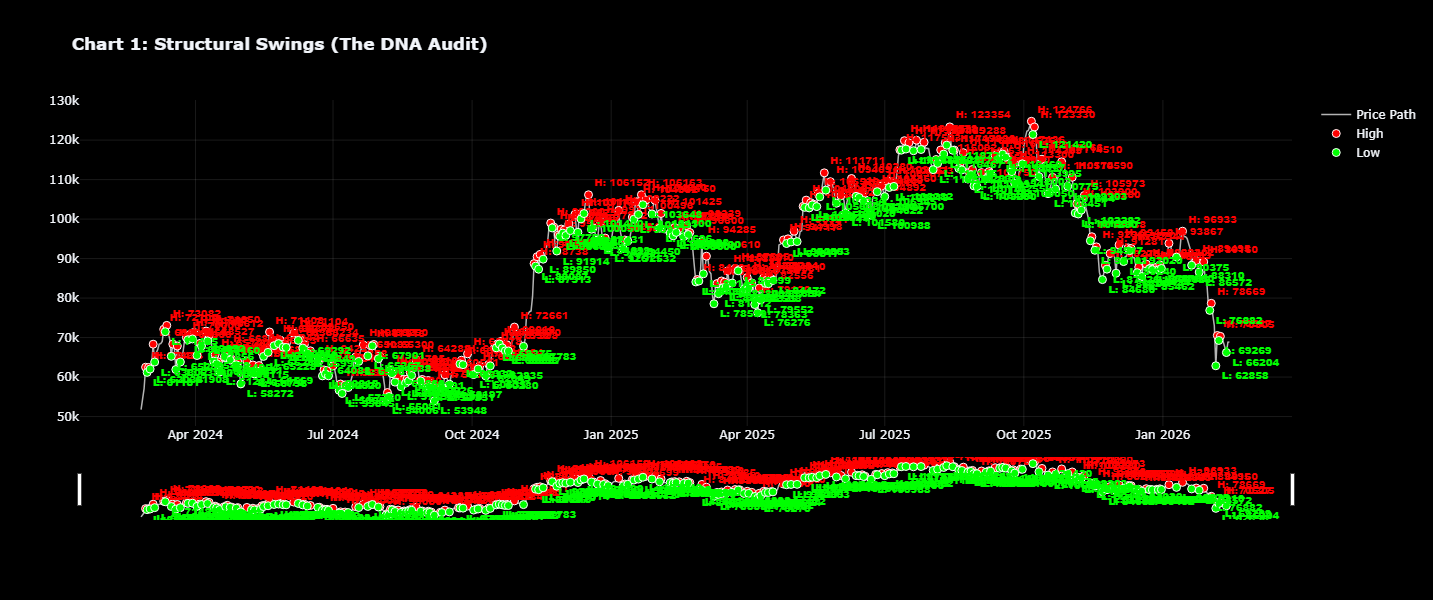

In [ ]:

fig1 = visualizer.create_structural_audit(df, swings, title="Chart 1: Structural Swings (The DNA Audit)")
fig1.show()



## 3. The Event Layer: Structural "Tagging" (Bob/Bos)
**Methodology:** A breakout is identified (Bob for Bullish, Bos for Bearish) when price closes through an unbroken swing level.
*   **Visual Logic:** Markers are intentionally placed on the **broken swing point**, not the breakout bar. This "tags" the historical structure as invalidated.
*   **Significance:** Establishes the bias for the higher-timeframe "Storyline."


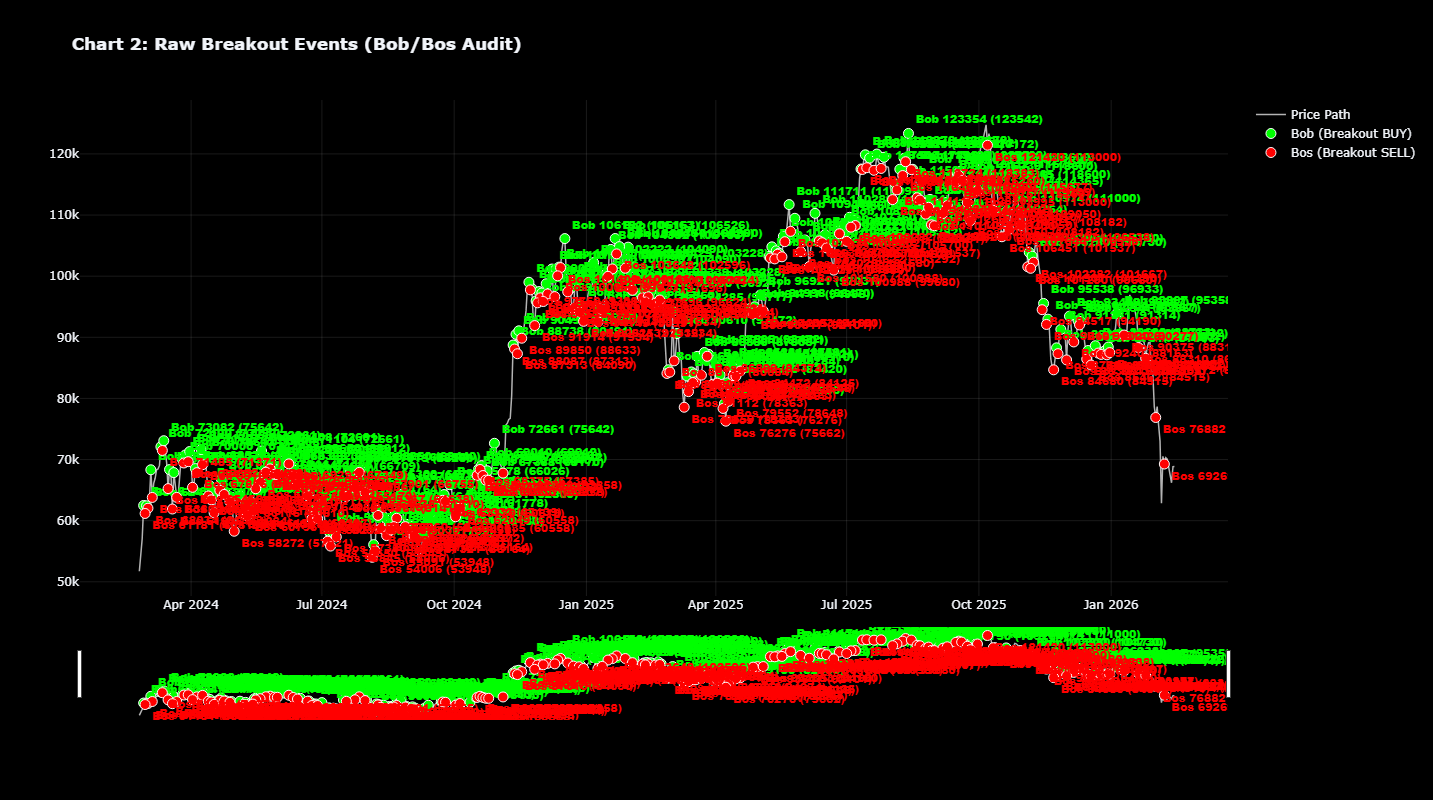

In [ ]:

fig2 = visualizer.create_breakout_audit(df, breakouts, title="Chart 2: Raw Breakout Events (Bob/Bos Audit)")
fig2.show()



## 4. The Siege Layer: 5-Pointer B2B Engines
**Methodology:** Zones are formed via a strict **5-Pointer pattern** (P1-p5). 
*   **Constraint 1:** No Interruption. If a new swing forms before Point 4 confirms, the zone is discarded.
*   **Constraint 2:** Early Fade. If L2 is breached before confirmation, the zone is void.
*   **Lifecycle:** Zones track T1 (L1), T2 (50%), and T3 (L2) touches based on High/Low wicks, but stay active until a **Close** breaches the invalidation border (L2).


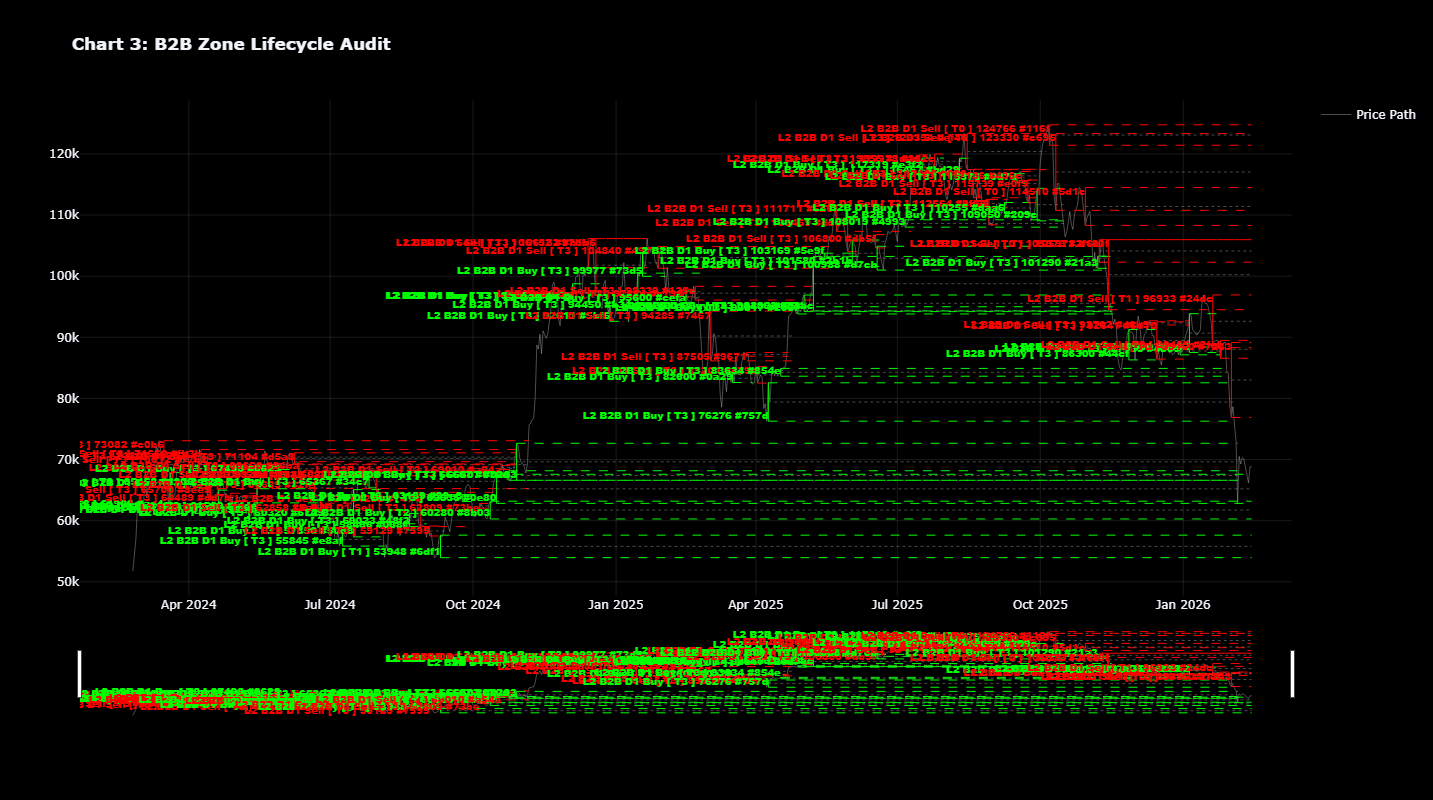

In [ ]:

fig3 = visualizer.create_b2b_audit(df, zones, title="Chart 3: B2B Zone Lifecycle Audit")
fig3.show()
